In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from tqdm import tqdm
from constants import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [5]:
data = pickle.load(open("data/orig_data.pkl", "rb"))
data = [x for x in data if x["cid"] not in {21884825, 22356502}]
cid2data = group_by(data, "cid")
print(len(cid2data))
pprint({k: len(v) for k, v in cid2data.items()})
print(np.mean([len(v) for v in cid2data.values()]))

date2data = group_by(data, "date")
print(len(date2data))
pprint({k: len(v) for k, v in date2data.items()})
print(np.mean([len(v) for v in date2data.values()]))

19
{154889: 36,
 227164: 32,
 20485832: 35,
 20862519: 37,
 21136050: 34,
 21173943: 36,
 21495458: 37,
 21777999: 34,
 21952290: 28,
 21979464: 38,
 22184813: 35,
 22278962: 38,
 22342982: 37,
 22469286: 16,
 22541584: 9,
 22602631: 27,
 22606899: 24,
 22607367: 17,
 22626330: 6}
29.263157894736842
38
{1: 15,
 2: 15,
 3: 15,
 4: 13,
 5: 14,
 6: 13,
 7: 14,
 801: 14,
 802: 14,
 803: 14,
 804: 14,
 805: 13,
 806: 13,
 807: 13,
 808: 14,
 809: 14,
 810: 15,
 811: 16,
 812: 15,
 813: 16,
 814: 2,
 815: 15,
 816: 15,
 817: 15,
 818: 15,
 819: 16,
 820: 15,
 821: 14,
 822: 17,
 823: 17,
 824: 16,
 825: 17,
 826: 17,
 827: 17,
 828: 15,
 829: 16,
 830: 16,
 831: 17}
14.631578947368421


In [45]:
wave_data = pickle.load(open("data/wave_data_no_stay_ref.pkl", "rb"))
# wave_data = pickle.load(open("data/wave_data.pkl", "rb"))
date2waves = group_by(wave_data, "date")
print(len(date2waves))
cid2waves = group_by(wave_data, "cid")
print(len(cid2waves))

37
19


In [52]:
no, noloc, nstay, nostay = [], [], [], []
wavess = [date2waves[d] for d in list(range(801, 814)) + list(range(815, 832)) + list(range(2, 8)) + [1]]
dates = list(range(801, 832)) + list(range(901, 907))
for ws in tqdm(wavess):
    ws = [w for w in ws if w["cid"] in [21777999, 22626330, 21173943, 22602631]]
    no.append(sum(len(x["orders"]) for x in ws))
    noloc.append(len({o["address_id"] for x in ws for o in x["orders"]}))
    nstay.append(sum(len(x["stays"]) for x in ws))
    wnostay = []
    for w in ws:
        sps = [s["point"] for s in w["stays"]]
        for o in w["orders"]:
            cnts = []
            t = o["finish_time"]
            for p in [o["xy"], o["address_xy"]]:
                cnt = 0
                if p is not None:
                    x, y = p
                    for x2, y2, t2 in sps:
                        if (x - x2) ** 2 + (y - y2) ** 2 < 4900 and abs(t - t2) < 3600:
                            cnt += 1
                cnts.append(cnt)
            wnostay.append(max(1, max(cnts)))
    assert len(wnostay) > 0
    nostay.append(np.mean(wnostay))        

100%|██████████| 37/37 [00:01<00:00, 20.71it/s]


In [40]:
def plot_bar(args):
    plt.figure(figsize=(13, 3*len(args)))
    for i, arg in enumerate(args):
        ns, title = arg
        assert len(ns) == len(dates)
        xs = list(range(len(ns)))
        plt.subplot(len(args), 1, i+1)
        plt.bar(xs, ns)
        plt.xticks(xs, dates)
        plt.title(title)
    plt.tight_layout()
    # plt.show()
    plt.savefig("figure/dataset_statistics.png")

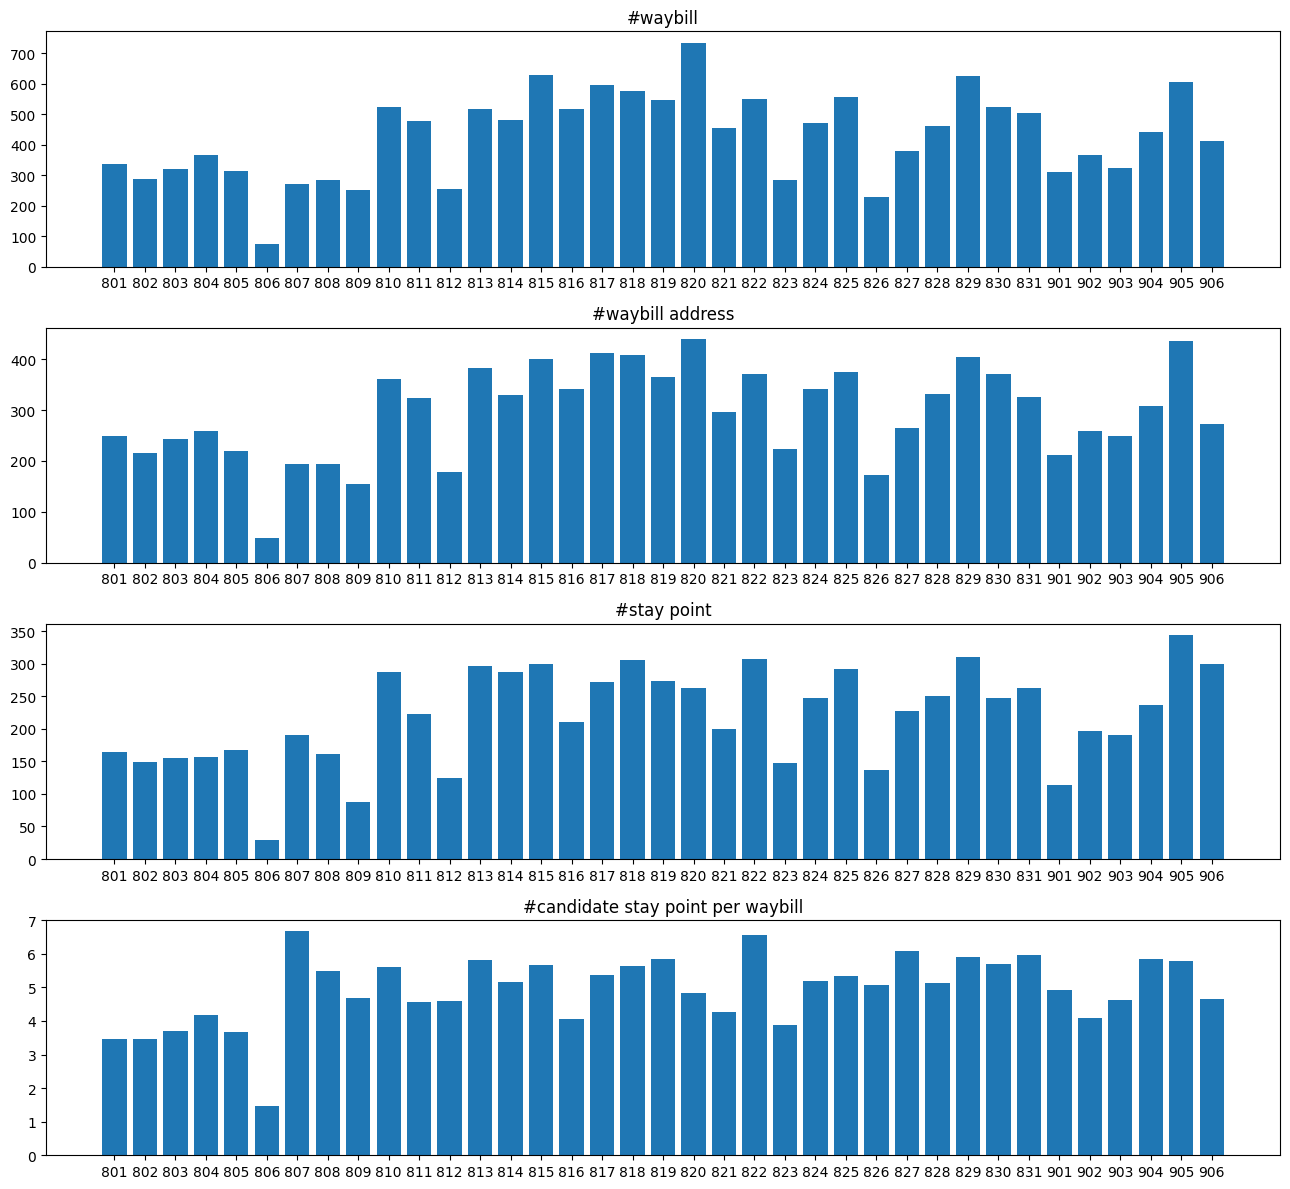

In [53]:
plot_bar([
    [no, "#waybill"],
    [noloc, "#waybill address"],
    [nstay, "#stay point"],
    [nostay, "#candidate stay point per waybill"]
])